In [3]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
import librosa.display
import soundfile as sf
import librosa.feature

In [9]:
# 1. Chuẩn bị dữ liệu 
def extract_features(file_path):
    try:
        # Tải file audio với soundfile trước
        audio, sr = sf.read(file_path)
        
        # Chuyển đổi sang mono nếu là stereo
        if len(audio.shape) > 1:
            audio = audio.mean(axis=1)
        
        # Cắt hoặc pad để có độ dài cố định (3 giây)
        target_length = 3 * sr
        if len(audio) > target_length:
            audio = audio[:target_length]
        else:
            audio = np.pad(audio, (0, max(0, target_length - len(audio))))
        
        # Trích xuất MFCC
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        
        # Trích xuất các đặc trưng phổ
        mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Chuẩn hóa các đặc trưng
        mfccs = np.mean(mfccs.T, axis=0)
        mel_spect = np.mean(mel_spect.T, axis=0)
        
        # Ghép các đặc trưng lại
        features = np.concatenate([mfccs, mel_spect])
        return features
        
    except Exception as e:
        print(f"Lỗi trích xuất đặc trưng từ {file_path}: {str(e)}")
        return None

In [13]:
# 2. Tải dữ liệu từ CSV và trích xuất đặc trưng
print("Đang tải và xử lý dữ liệu...")
df = pd.read_csv('speech_emotion1.csv')

Đang tải và xử lý dữ liệu...


In [14]:
# Trích xuất đặc trưng
features = []
labels = []
for index, row in df.iterrows():
    print(f"Đang xử lý file {index+1}/{len(df)}")
    feature = extract_features(row['speech'])
    if feature is not None:
        features.append(feature)
        labels.append(row['emotion'])

Đang xử lý file 1/1400
Đang xử lý file 2/1400
Đang xử lý file 3/1400
Đang xử lý file 4/1400
Đang xử lý file 5/1400
Đang xử lý file 6/1400
Đang xử lý file 7/1400
Đang xử lý file 8/1400
Đang xử lý file 9/1400
Đang xử lý file 10/1400
Đang xử lý file 11/1400
Đang xử lý file 12/1400
Đang xử lý file 13/1400
Đang xử lý file 14/1400
Đang xử lý file 15/1400
Đang xử lý file 16/1400
Đang xử lý file 17/1400
Đang xử lý file 18/1400
Đang xử lý file 19/1400
Đang xử lý file 20/1400
Đang xử lý file 21/1400
Đang xử lý file 22/1400
Đang xử lý file 23/1400
Đang xử lý file 24/1400
Đang xử lý file 25/1400
Đang xử lý file 26/1400
Đang xử lý file 27/1400
Đang xử lý file 28/1400
Đang xử lý file 29/1400
Đang xử lý file 30/1400
Đang xử lý file 31/1400
Đang xử lý file 32/1400
Đang xử lý file 33/1400
Đang xử lý file 34/1400
Đang xử lý file 35/1400
Đang xử lý file 36/1400
Đang xử lý file 37/1400
Đang xử lý file 38/1400
Đang xử lý file 39/1400
Đang xử lý file 40/1400
Đang xử lý file 41/1400
Đang xử lý file 42/1400
Đ

In [15]:
# Chuyển đổi thành numpy array
X = np.array(features)
print("Shape của features:", X.shape)

Shape của features: (1400, 168)


In [16]:
# Mã hóa nhãn
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)
print("Shape của labels:", y.shape)

Shape của labels: (1400, 7)


In [17]:
# 3. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 4. Xây dựng mô hình CNN
model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Input(shape=(X.shape[1],)),
    tf.keras.layers.Reshape((-1, 1)),
    
    # CNN layers
    tf.keras.layers.Conv1D(256, 5, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv1D(128, 5, activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.3),
    
    # Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

In [19]:
# 5. Biên dịch mô hình
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Hiển thị cấu trúc mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 168, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 168, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 168, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 84, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 84, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 84, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 42, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5376)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,376,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,351 (6.02 MB)

 Trainable params: 1,576,583 (6.01 MB)

 Non-trainable params: 768 (3.00 KB)

In [21]:
# 6. Training với callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_emotion_model.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
]

In [22]:
# Training
print("\nBắt đầu training...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)


Bắt đầu training...
Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4809 - loss: 1.5931

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4864 - loss: 1.5742 - val_accuracy: 0.4250 - val_loss: 1.4266
Epoch 2/20
33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9100 - loss: 0.2192

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9114 - loss: 0.2166 - val_accuracy: 0.7464 - val_loss: 0.6212
Epoch 3/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9546 - loss: 0.1416

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9548 - loss: 0.1416 - val_accuracy: 0.7750 - val_loss: 0.4768
Epoch 4/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9559 - loss: 0.1235

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9565 - loss: 0.1222 - val_accuracy: 0.9179 - val_loss: 0.2028
Epoch 5/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9705 - loss: 0.0822

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9707 - loss: 0.0814 - val_accuracy: 0.9571 - val_loss: 0.1307
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9779 - loss: 0.0577 - val_accuracy: 0.9571 - val_loss: 0.1184
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9799 - loss: 0.0571

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9799 - loss: 0.0572 - val_accuracy: 0.9857 - val_loss: 0.0527
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9923 - loss: 0.0265

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9922 - loss: 0.0266 - val_accuracy: 0.9893 - val_loss: 0.0200
Epoch 9/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9856 - loss: 0.0383

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9856 - loss: 0.0384 - val_accuracy: 0.9964 - val_loss: 0.0071
Epoch 10/20
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9846 - loss: 0.0705

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9845 - loss: 0.0706 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9795 - loss: 0.0589 - val_accuracy: 0.9964 - val_loss: 0.0103
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9854 - loss: 0.0486 - val_accuracy: 0.9536 - val_loss: 0.1681
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9844 - loss: 0.0366 - val_accuracy: 0.9929 - val_loss: 0.0135
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9950 - loss: 0.0184 - val_accuracy: 0.9964 - val_loss: 0.0134
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9837 - loss: 0.0300 - val_accuracy: 0.9964 - val_loss: 0.0048


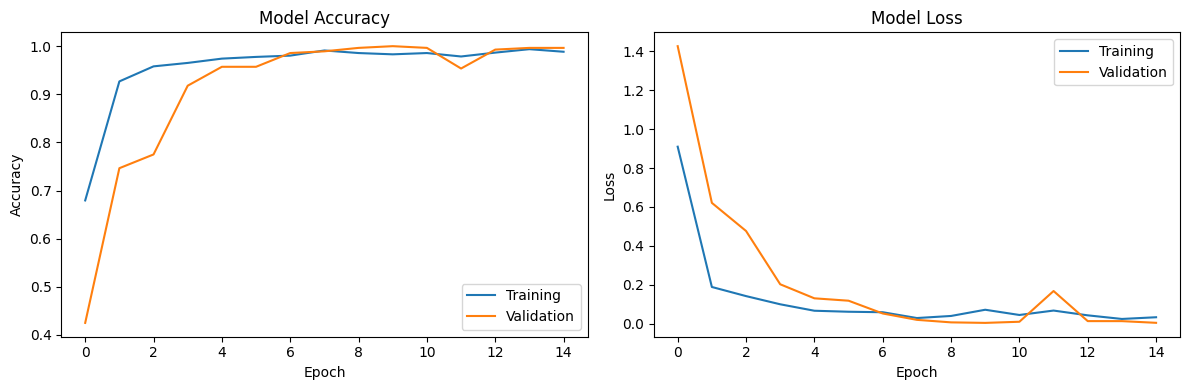

In [23]:
# 7. Vẽ đồ thị kết quả training
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

In [24]:
# 8. Đánh giá mô hình
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nĐộ chính xác trên tập test: {test_acc*100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0039 

Độ chính xác trên tập test: 100.00%


In [25]:
# 9. Lưu mô hình
model.save('emotion_recognition_model11.h5')
print("Đã lưu mô hình thành công!")

Đã lưu mô hình thành công!


In [26]:
# 10. Tạo hàm dự đoán
def predict_emotion(file_path):
    # Trích xuất đặc trưng
    features = extract_features(file_path)
    if features is not None:
        # Dự đoán
        features = np.expand_dims(features, axis=0)
        prediction = model.predict(features)
        predicted_emotion = le.inverse_transform([np.argmax(prediction[0])])[0]
        confidence = np.max(prediction[0])
        return predicted_emotion, confidence
    return None, None

In [32]:
# Test thử với một file
test_file = "i-am-so-angry-82678.wav"  # Thay đổi đường dẫn phù hợp
emotion, confidence = predict_emotion(test_file)
if emotion:
    print(f"\nCảm xúc dự đoán cho file {test_file}: {emotion}")
    print(f"Độ tin cậy: {confidence*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Cảm xúc dự đoán cho file i-am-so-angry-82678.wav: sad
Độ tin cậy: 100.00%
